In [94]:
# Importing data processing and Linear Algebra libraries 
import pandas as pd 
import numpy as np

# Importing data visualization libraries 
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
# Importing data spliting data library for training and testing from given dataframe
from sklearn.model_selection import train_test_split

# Module for Scaling the data 
from sklearn.preprocessing import StandardScaler

# Importing Logistic Regression Module
from sklearn.linear_model import LogisticRegression

# Library module to check model accuracy.
from sklearn.metrics import accuracy_score, roc_curve


In [97]:
# Readin data from CSV file
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [103]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [98]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [102]:
# Attributes present in data frame
df.columns.unique()

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [8]:
for i in list(df.columns):
    print("{}----{}".format(i,df[i].value_counts().shape[0]))

age----41
sex----2
cp----4
trtbps----49
chol----152
fbs----2
restecg----3
thalachh----91
exng----2
oldpeak----40
slp----3
caa----5
thall----4
output----2


In [104]:
# Categorical and Numerical Data 
categorical_lst  = list(['sex','cp','fbs','restecg','exng','slp','caa','thall','output'])
numerical_lst = list(['age','trtbps','chol','thalachh','oldpeak','output'])

## Categorical Analysis 

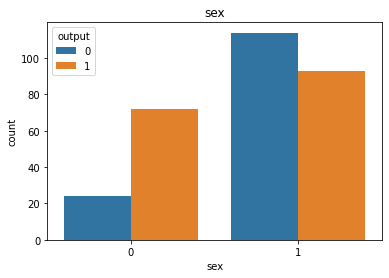

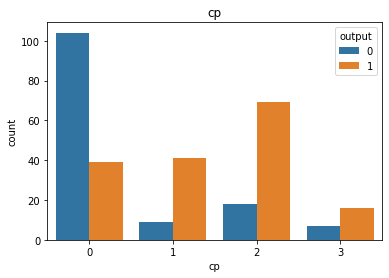

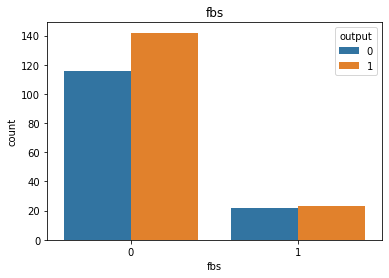

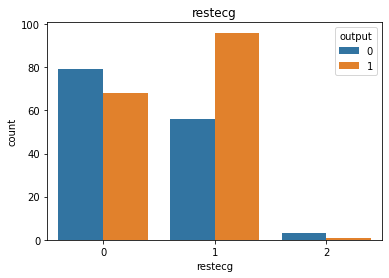

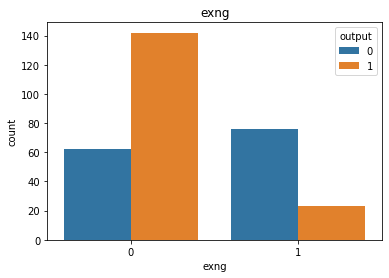

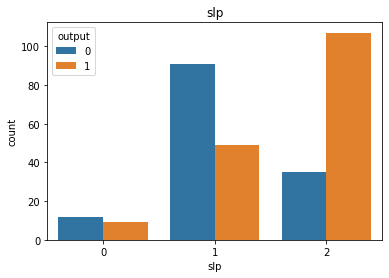

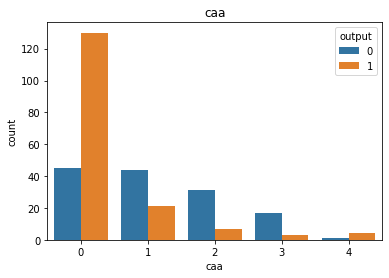

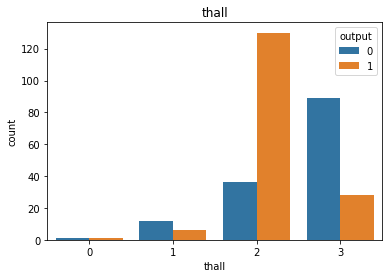

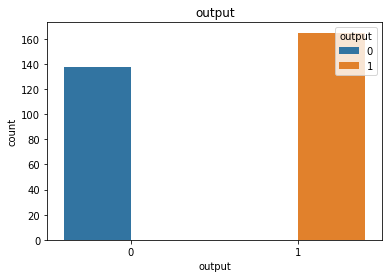

In [105]:
for x in categorical_lst:
    plt.figure()
    sns.countplot(x=x,data = df.loc[:,categorical_lst],hue='output')
    plt.title(x)

## Numerical Data Analysis

<Figure size 432x288 with 0 Axes>

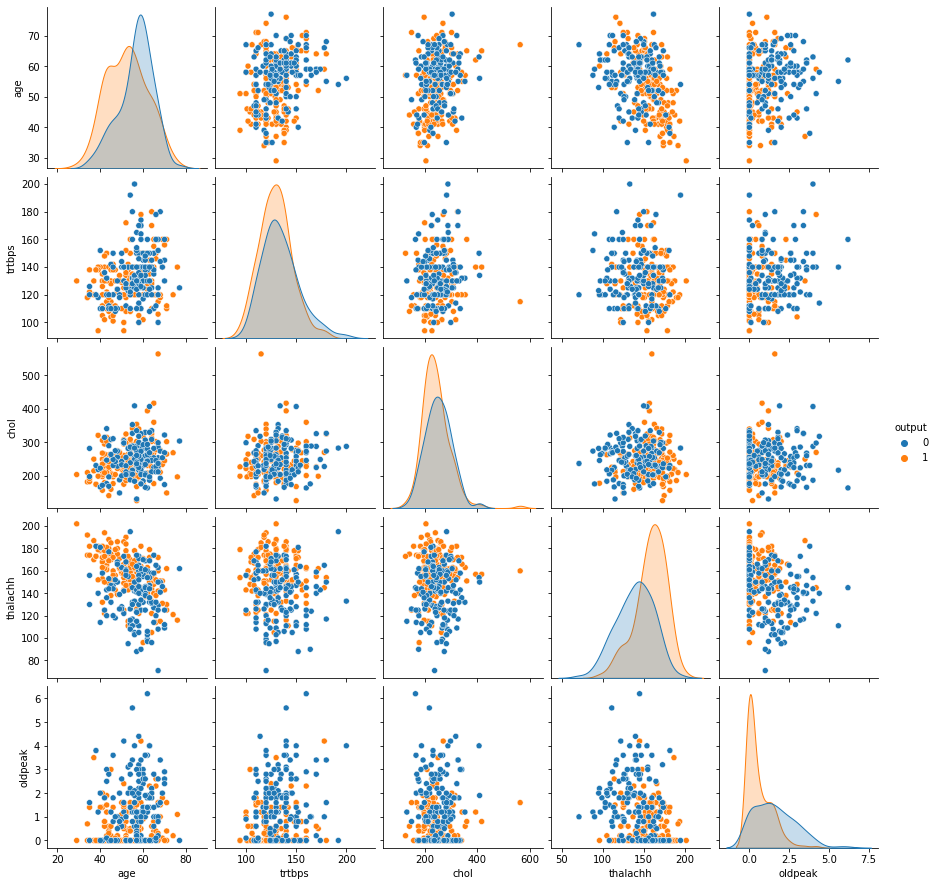

In [12]:
plt.figure()
sns.pairplot(data = df.loc[:,numerical_lst],hue= 'output')

## Scalling the Data 

In [13]:
scaler = StandardScaler()
scalled_array = scaler.fit_transform(df[numerical_lst[:-1]])
scalled_array

array([[ 0.9521966 ,  0.76395577, -0.25633371,  0.01544279,  1.08733806],
       [-1.91531289, -0.09273778,  0.07219949,  1.63347147,  2.12257273],
       [-1.47415758, -0.09273778, -0.81677269,  0.97751389,  0.31091206],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , -0.37813176,  2.03630317],
       [ 0.29046364, -0.09273778, -2.2275329 , -1.51512489,  0.13837295],
       [ 0.29046364, -0.09273778, -0.19835726,  1.0649749 , -0.89686172]])

In [14]:
df_temp = pd.DataFrame(data=scalled_array,columns=numerical_lst[:-1])
df_temp.head()

,age,trtbps,chol,thalachh,oldpeak
0,0.952197,0.763956,-0.256334,0.015443,1.087338
1,-1.915313,-0.092738,0.072199,1.633471,2.122573
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705
4,0.290464,-0.663867,2.082050,0.583939,-0.379244


In [15]:
df_dummy = pd.concat([df_temp,df['output']],axis=1)
df_dummy.head()
# This data frame will be used in boxplot,catplot and swarm plot analysis 

,age,trtbps,chol,thalachh,oldpeak,output
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1


In [16]:
df_new = pd.melt(df_dummy,id_vars='output',var_name='features',value_name='values')
df_new.head(20)

,output,features,values
0,1,age,0.952197
1,1,age,-1.915313
2,1,age,-1.474158
3,1,age,0.180175
4,1,age,0.290464
5,1,age,0.290464
6,1,age,0.180175
7,1,age,-1.143291
8,1,age,-0.260980
9,1,age,0.290464


## Box Plot Analysis 

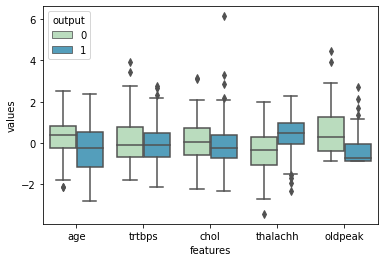

In [106]:
# We can also find some outliers in plot
plt.figure()
sns.boxplot(data = df_new, x = 'features',y='values',hue='output',palette='GnBu')
plt.show()

## Strip - Plot Analysis

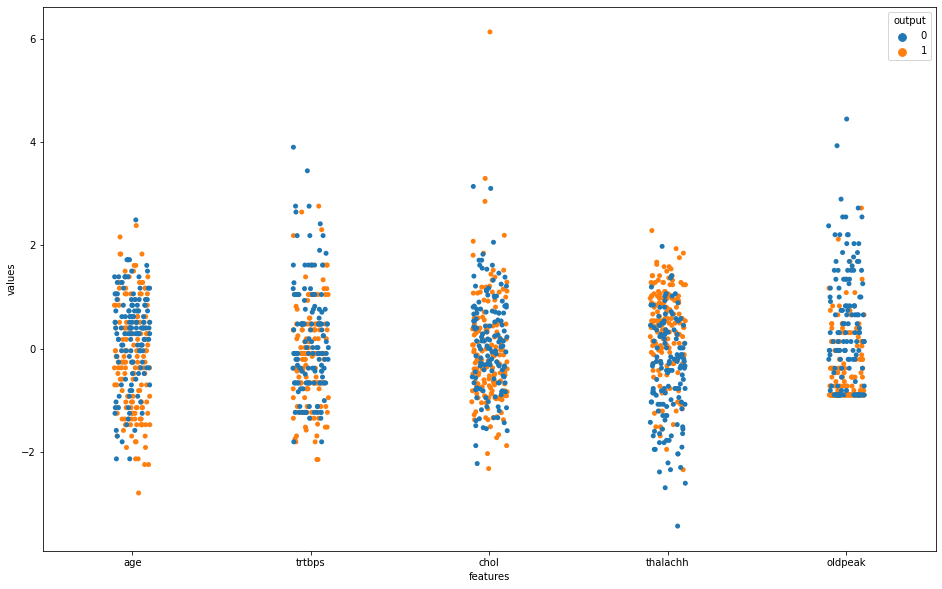

In [18]:
plt.figure(figsize=(16,10))
sns.stripplot(data = df_new, x = 'features',y = 'values',hue = 'output')
plt.show()

## Swarm Plot Analysis

D:\SOftwares\ANACONDA\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\SOftwares\ANACONDA\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='features', ylabel='values'>

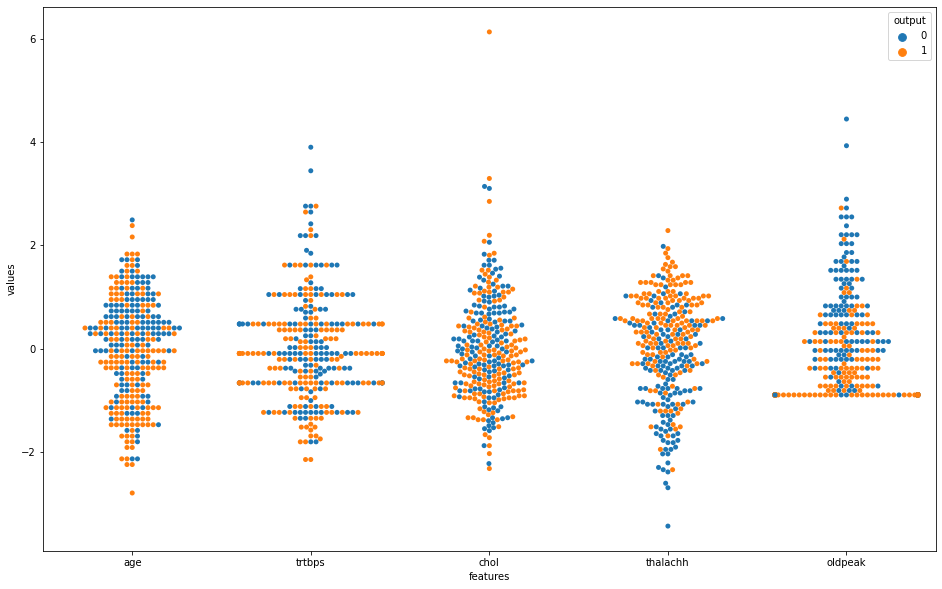

In [19]:
plt.figure(figsize=(16,10))
sns.swarmplot(data = df_new,x= 'features',y='values',hue='output')

## Cat Plot Analysis

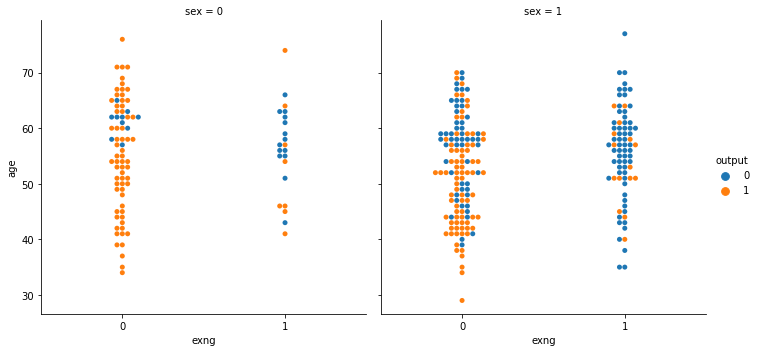

In [20]:
figsize=(16,10)
sns.catplot(data = df,x = 'exng',y='age',hue= 'output',col='sex',kind = 'swarm')

## Correlation Analysis

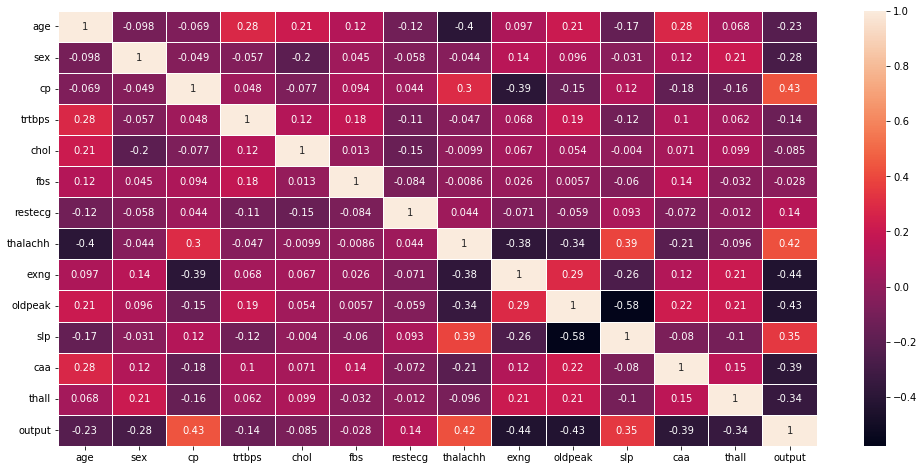

In [21]:
plt.figure(figsize=(17,8))
sns.heatmap(df.corr(),annot=True,linewidths=1)
plt.show()

## Outliers Analysis

In [61]:
for i in numerical_lst:
    
    Q1 = np.percentile(df.loc[:, i],25)
    Q3 = np.percentile(df.loc[:, i],75)
    
    IQR = Q3 - Q1
    # outliers = df.loc[(df[i] < Q1 - 2.5 * IQR) | (df[i] > Q3 + 2.5 * IQR)
    
    upper = np.where(df.loc[:, i] >= (Q3 +2.5*IQR))
    lower = np.where(df.loc[:, i] <= (Q1 - 2.5*IQR))
    
    ##upper  = df[df[i] >= (Q3 + 2.5 * IQR)]
    ##lower  = df[df[i] <= (Q1 - 2.5 * IQR)]
    
    df.drop(lower[0],inplace=True)
    df.drop(upper[0],inplace=True)
   

In [62]:
df.shape

(298, 14)

## Modeling 

In [63]:
df1 = df.copy()
df1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [69]:
df1 = pd.get_dummies(df1,drop_first = True)
df1.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [70]:
x = df1.drop(['output'],axis=1)
y = df1['output']
x.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


## Scalling

In [71]:
scaler = StandardScaler()
x[numerical_lst[:-1]] = scaler.fit_transform(x[numerical_lst[:-1]])

## Train And Split 

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.1,random_state=3)

## Logistic Regression

In [73]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

## Prediction 

In [82]:
y_pred = LR.predict(x_test)
y_pred_prob =LR.predict_proba(x_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [80]:
print("Test Accuracy : {}".format(accuracy_score(y_pred,y_test)))

Test Accuracy : 0.9


## ROC Curve

In [83]:
fpr,tpr,thresshold = roc_curve(y_test,y_pred_prob[:,1])

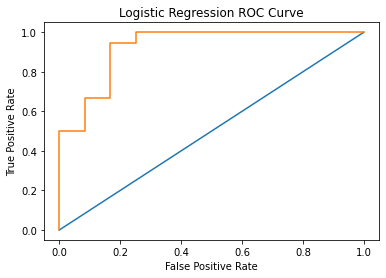

In [93]:
plt.plot([0,1],[0,1])
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()